In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data
Event  = pd.read_csv("data.csv")
products = pd.read_csv("tanishq_products.csv")

C:\Users\rajat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Events Clickstream data
Event.head()

,action_type,user_type,epoch,object_id,user_id,sid,og_url,tt_id,sub_account,utm_source,utm_campaign,utm_medium,referrer,utm_content,latitude,longitude,useragent,variant_id
0,view,guest,2019-11-28 20:59:00.000,Buy Engagement Rings Online - Shop Diamond Eng...,NaN,0.693364,https://www.tanishq.co.in/shop/engagement-ring...,1574974426476,tanishq,NaN,NaN,NaN,NaN,NaN,26.9167,75.8167,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1,view,guest,2019-11-28 20:59:00.000,500064ONAABB09,NaN,0.472003,https://www.tanishq.co.in/product/tanishq-18kt...,1574973022537,tanishq,NaN,NaN,NaN,NaN,NaN,13.0843,80.2805,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3IH000030
2,view,guest,2019-11-28 20:59:01.000,Buy Diamond Earrings Online in India | Shop La...,NaN,0.897467,https://www.tanishq.co.in/shop/diamond-earring...,1574974640117,tanishq,NaN,NaN,NaN,NaN,NaN,38.9841,-77.3672,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like...,NaN
3,view,guest,2019-11-28 20:59:01.000,511250PGUAAA00,NaN,0.403961,https://www.tanishq.co.in/product/tanishq-22kt...,1564659331282,tanishq,NaN,Sok_Traffic_MultipleAds_Prospecting_Tanishq_No...,cpc,m.facebook.com,NaN,26.9167,75.8167,Mozilla/5.0 (Linux; Android 8.1.0; Redmi Note ...,2ED000494
4,view,guest,2019-11-28 20:59:01.000,502112FHHLAJ54,NaN,0.961382,https://www.tanishq.co.in/product/tanishq-18kt...,1574974721184,tanishq,NaN,NaN,NaN,NaN,NaN,32.1000,76.2667,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_2 like...,3IH000001


In [4]:
# Shape of Event data
Event.shape

(801810, 18)

In [5]:
# Products catalog data
products.head()

,_id,additional_image,adult,availability_date,avlble,brand,business_unit,category,collection,color,...,sale_price_usd,status,sub_account,subcategories,trendrank,unit,updated,url,variants,width
0,1.969160e+37,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,0,Tanishq,Jewellery,NaN,NaN,NaN,...,61.42,Active,[tanishq],Jeweller,NaN,NaN,False,/product/tanishq-18kt-gold-and-diamond-stud-ea...,"{u'2JA000003': {u'price': 4431.0, u'listprice'...",NaN
1,9.450330e+37,https://staticimg.titan.co.in/Mia/Catalog/5528...,No,NaN,1,MIA,Jewellery,tq-mia-collections,Mia Birthstone Pendants,NaN,...,227.07,Active,"[tanishq, mia]",Jewellery,1.0,millimeters,False,/product/chain-pendant-552819gahaacz,"{u'2BD000278': {u'price': 16149.0, u'listprice...",NaN
2,6.910120e+37,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,Contemporary,NaN,...,161.21,Active,[tanishq],Diamond,NaN,NaN,False,/product/tanishq-18kt-rose-gold-and-diamond-fi...,"{u'2JA005106': {u'price': 11493.0, u'listprice...",16.4 mm
3,1.111910e+38,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,NaN,NaN,...,107.84,Active,[tanishq],Jeweller,30.0,NaN,False,/product/tanishq-18kt-gold-and-diamond-earring...,"{u'2BD005443': {u'price': 7688.0, u'listprice'...",NaN
4,2.911930e+38,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,NaN,NaN,...,2813.45,Active,[tanishq],Jeweller,1.0,NaN,False,/product/22kt-gold-and-ruby-neckwear-in-a-flor...,"{u'2BA805635': {u'price': 200571.0, u'listpric...",NaN


In [6]:
# Shape of product catalog
products.shape

(7062, 60)

In [7]:
# features in product catalog
products.columns

Index(['_id', 'additional_image', 'adult', 'availability_date', 'avlble',
       'brand', 'business_unit', 'category', 'collection', 'color',
       'condition', 'created_on', 'currency', 'currency_symbol', 'description',
       'diamond_clarity', 'diamond_color', 'diamond_cut',
       'discount_percentage', 'expiration_date', 'full_description',
       'gemstone1', 'gemstone2', 'gemstone3', 'gemstone4', 'gemstone5',
       'gender', 'goldkaratage', 'google_product_category', 'gtin', 'height',
       'id', 'identifier_exists', 'image', 'item_group_id', 'jew_size',
       'jewellery_type', 'last_modified_on', 'listprice', 'metal',
       'metal_color', 'mfr_code', 'mpn', 'name', 'occasion', 'out_of_shelf',
       'price', 'price_usd', 'product', 'product_type', 'sale_price_usd',
       'status', 'sub_account', 'subcategories', 'trendrank', 'unit',
       'updated', 'url', 'variants', 'width'],
      dtype='object')

In [8]:
# Features in Events data
Event.columns

Index(['action_type', 'user_type', 'epoch', 'object_id', 'user_id', 'sid',
       'og_url', 'tt_id', 'sub_account', 'utm_source', 'utm_campaign',
       'utm_medium', 'referrer', 'utm_content', 'latitude', 'longitude',
       'useragent', 'variant_id'],
      dtype='object')

In [9]:
# Renaming a feature in events clickstream data.
Event = Event.rename(columns={'og_url': 'log_url'})

### Task1: Segment users based on their browsing activity

In [10]:
# user browsing activity
Event['action_type'].value_counts()

view                    796899
add_to_cart               4045
remove_from_cart           395
add_to_wishlist            208
place_order                136
register                   110
remove_from_wishlist        17
Name: action_type, dtype: int64

Text(0.5, 1.0, 'User browsing activity')

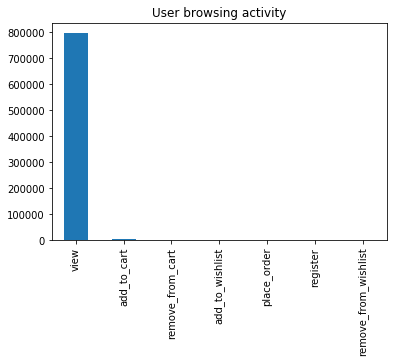

In [11]:
Event['action_type'].value_counts().plot.bar()
plt.title("User browsing activity")

In [13]:
# Segmenting the user according to his browsing activity
Event['Counter'] = 1 
Event.groupby(['tt_id','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,add_to_cart,add_to_wishlist,place_order,register,remove_from_cart,remove_from_wishlist,view
tt_id,,,,,,,
1556111154464,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1556111918072,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1556111968791,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1556112008897,0.0,0.0,0.0,0.0,0.0,0.0,12.0
1556112065913,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1556112113058,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1556112113983,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1556112127950,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1556112320858,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [14]:
# unique values in user type.
Event['user_type'].value_counts()

guest    795528
email      6282
Name: user_type, dtype: int64

Text(0.5, 1.0, 'user type')

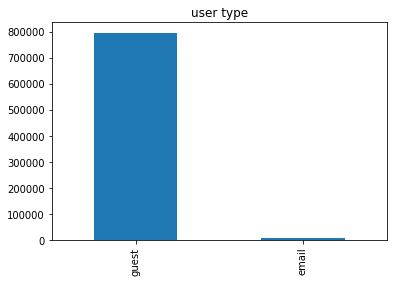

In [15]:
Event['user_type'].value_counts().plot.bar()
plt.title('user type')

In [16]:
# Segmenting user activity on the basis of their login.
Event['Counter'] = 1 
Event.groupby(['user_type','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,add_to_cart,add_to_wishlist,place_order,register,remove_from_cart,remove_from_wishlist,view
user_type,,,,,,,
email,288.0,208.0,81.0,110.0,193.0,0.0,5402.0
guest,3757.0,0.0,55.0,0.0,202.0,17.0,791497.0


In [17]:
# Segmenting the user according to the user_type
Event['Counter'] = 1
Event.groupby([ 'tt_id','user_type'])['Counter'].sum().unstack().fillna(0)

user_type,email,guest
tt_id,,
1556111154464,0.0,4.0
1556111918072,0.0,5.0
1556111968791,0.0,3.0
1556112008897,0.0,12.0
1556112065913,0.0,3.0
1556112113058,0.0,3.0
1556112113983,2.0,0.0
1556112127950,0.0,1.0
1556112320858,0.0,11.0


In [18]:
# Source from which users are coming.
Event['utm_source'].value_counts()

criteo             19222
yfret              14466
FBTanishq           3964
Facebook            1001
GMB                    6
gooTANSEARCH           5
HockeyCurve            5
yotpo                  4
Netcore_1080_16        1
Name: utm_source, dtype: int64

Text(0.5, 1.0, 'Traffic source')

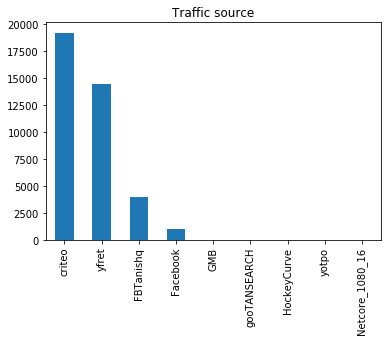

In [19]:
Event['utm_source'].value_counts().plot.bar()
plt.title("Traffic source")

In [20]:
# Segmenting user activity on the basis of Source(from where they are coming.)
Event['Counter'] = 1
Event.groupby(['utm_source','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,add_to_cart,add_to_wishlist,view
utm_source,,,
FBTanishq,110.0,7.0,3847.0
Facebook,0.0,0.0,1001.0
GMB,0.0,0.0,6.0
HockeyCurve,0.0,0.0,5.0
Netcore_1080_16,0.0,0.0,1.0
criteo,278.0,0.0,18944.0
gooTANSEARCH,0.0,0.0,5.0
yfret,111.0,14.0,14341.0
yotpo,0.0,0.0,4.0


In [21]:
# Medium from which users are coming.
Event['utm_medium'].value_counts()

cpc                 158462
retargeting          19219
web                  14466
CPC                   1001
Click to website         6
Banners                  5
email                    4
71432512513              1
banner                   1
post                     1
71432512553              1
71432518753              1
71432516593              1
71432512313              1
Mailer                   1
Name: utm_medium, dtype: int64

Text(0.5, 1.0, 'Traffic through medium')

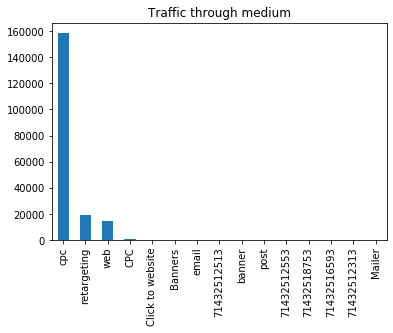

In [22]:
Event['utm_medium'].value_counts().plot.bar()
plt.title("Traffic through medium")

In [23]:
# Segmenting user browsing activity on the basis of the medium from which they are coming.
Event['Counter'] = 1 
Event.groupby(['utm_medium','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,view,register,add_to_cart,add_to_wishlist
utm_medium,,,,
71432512313,1.0,0.0,0.0,0.0
71432512513,1.0,0.0,0.0,0.0
71432512553,1.0,0.0,0.0,0.0
71432516593,1.0,0.0,0.0,0.0
71432518753,1.0,0.0,0.0,0.0
Banners,5.0,0.0,0.0,0.0
CPC,1001.0,0.0,0.0,0.0
Click to website,6.0,0.0,0.0,0.0
Mailer,1.0,0.0,0.0,0.0


In [24]:
# Campaign through which users are coming.
Event['utm_campaign'].value_counts()

Sok_Traffic_MultipleAds_Prospecting_Tanishq_NonOffer_MultipleTG_All_181119                 154503
lowerfunnel_tanishq                                                                         15747
personalized:tanishq%5Frelated%5Fproducts                                                    4894
product:tanishq%5Frel%5Fviews                                                                4189
cca                                                                                          3472
Sok_DPA_Tanishq_MultipleProductCategories_CartAbandoners_MultipleDurations_120619            2622
product:tanishq%5Frelated%5Fproducts                                                         1989
Sok_DBA_Tanishq_Beh_RellationshipStatus_All_230219                                           1216
productlist:tanishq%5Ftop%5Fselling                                                           871
personalized:tanishq%5Fall                                                                    807
Sok_Conv_CollectionA

In [25]:
# Segmenting user bowsing activity according to the campaign.
Event['Counter'] = 1 
Event.groupby(['utm_campaign','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,view,add_to_cart,add_to_wishlist,register
utm_campaign,,,,
271945369,5.0,0.0,0.0,0.0
AT2019,1.0,0.0,0.0,0.0
Google-_-BD-_-HockeyCurve-_-June,5.0,0.0,0.0,0.0
Promises - GMB,6.0,0.0,0.0,0.0
Sok_Conv_CollectionAd_Prospecting_Tanishq_EngagementRings_Int_EngagementRing_All_261119,660.0,0.0,0.0,0.0
Sok_Conv_PPLA_Prospecting_Tanishq_EngagementRings_Dem_Engagement_All_211119,257.0,0.0,0.0,0.0
Sok_Conv_PPLA_Prospecting_Tanishq_EngagementRings_Int_EngagementRing_All_211119,84.0,0.0,0.0,0.0
Sok_DBA_Tanishq_Beh_RellationshipStatus_All_230219,1202.0,12.0,2.0,0.0
Sok_DPA_Tanishq_MultipleProductCategories_CartAbandoners_MultipleDurations_120619,2526.0,93.0,2.0,1.0


In [26]:
# Segmenting user bowsing activity according to the campaign.
Event['Counter'] = 1 
Event.groupby(['utm_content','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,view,add_to_cart,add_to_wishlist,register
utm_content,,,,
391510637170,1.0,0.0,0.0,0.0
391510637173,1.0,0.0,0.0,0.0
391510637176,1.0,0.0,0.0,0.0
392413278405,1.0,0.0,0.0,0.0
392413278609,1.0,0.0,0.0,0.0
Sok_DBA_Tanishq_Dem_RellationshipStatus_All_230219,1202.0,12.0,2.0,0.0
Sok_DPA_Tanishq_BanglesRingsNosePins_CartAbandoners_180Days_120619,643.0,20.0,0.0,0.0
Sok_DPA_Tanishq_BanglesRingsNosePins_Purchasers_180Days_120619,12.0,1.0,0.0,0.0
Sok_DPA_Tanishq_EarringsPendantsChains_CartAbandoners_180Days_120619,1883.0,73.0,2.0,1.0


In [27]:
# Segmenting user bowsing activity according to the campaign.
Event['Counter'] = 1 
Event.groupby(['referrer','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,view,add_to_cart,place_order,remove_from_cart,register
referrer,,,,,
10.205.55.238,2.0,0.0,0.0,0.0,0.0
ads.as.criteo.com,11728.0,189.0,0.0,0.0,0.0
ads.google.com,1.0,0.0,0.0,0.0,0.0
alohafind.com,4.0,0.0,0.0,0.0,0.0
analytics.google.com,2.0,0.0,0.0,0.0,0.0
astrology-raftaar-in.cdn.ampproject.org,1.0,0.0,0.0,0.0,0.0
bengali.abplive.com,19.0,0.0,0.0,0.0,0.0
bengali.indianexpress.com,1.0,0.0,0.0,0.0,0.0
blog.tanishq.co.in,19.0,0.0,0.0,0.0,0.0


### Task2: Generate product catalog insights on category/subcategory level.

In [28]:
# Visualising products data.
products.head()

,_id,additional_image,adult,availability_date,avlble,brand,business_unit,category,collection,color,...,sale_price_usd,status,sub_account,subcategories,trendrank,unit,updated,url,variants,width
0,1.969160e+37,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,0,Tanishq,Jewellery,NaN,NaN,NaN,...,61.42,Active,[tanishq],Jeweller,NaN,NaN,False,/product/tanishq-18kt-gold-and-diamond-stud-ea...,"{u'2JA000003': {u'price': 4431.0, u'listprice'...",NaN
1,9.450330e+37,https://staticimg.titan.co.in/Mia/Catalog/5528...,No,NaN,1,MIA,Jewellery,tq-mia-collections,Mia Birthstone Pendants,NaN,...,227.07,Active,"[tanishq, mia]",Jewellery,1.0,millimeters,False,/product/chain-pendant-552819gahaacz,"{u'2BD000278': {u'price': 16149.0, u'listprice...",NaN
2,6.910120e+37,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,Contemporary,NaN,...,161.21,Active,[tanishq],Diamond,NaN,NaN,False,/product/tanishq-18kt-rose-gold-and-diamond-fi...,"{u'2JA005106': {u'price': 11493.0, u'listprice...",16.4 mm
3,1.111910e+38,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,NaN,NaN,...,107.84,Active,[tanishq],Jeweller,30.0,NaN,False,/product/tanishq-18kt-gold-and-diamond-earring...,"{u'2BD005443': {u'price': 7688.0, u'listprice'...",NaN
4,2.911930e+38,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,NaN,NaN,...,2813.45,Active,[tanishq],Jeweller,1.0,NaN,False,/product/22kt-gold-and-ruby-neckwear-in-a-flor...,"{u'2BA805635': {u'price': 200571.0, u'listpric...",NaN


In [29]:
# Unique Categories in products.
products.category.value_counts()

tq-mia-category       639
Collections           299
Jeweller              159
Mia                   119
Jewellery              66
Silver                 19
tq-occasion            16
tq-mia-collections     12
Jewellery Type          5
Gifting                 1
Name: category, dtype: int64

Text(0.5, 1.0, 'category')

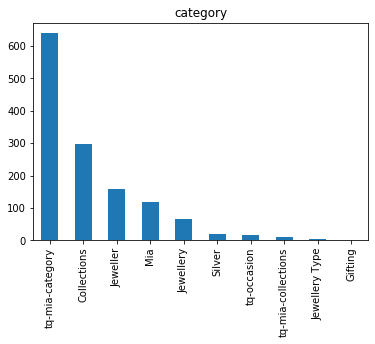

In [30]:
products.category.value_counts().plot.bar()
plt.title("category")

In [31]:
# Unique SubCategories in products.
products.subcategories.value_counts()

Jeweller                       4691
Jewellery                       767
Diamond                         751
Gold                            270
Greatdiamondsale                159
Smolitaires                     126
Mia Classics                    120
Electrify                        48
Rings                            36
Sassysilver                      19
tq-engagement-rings              16
Earrings                         13
Pendants                         11
tq-mia-rings                      8
Platinum Jewellery                4
tq-diamond-treats                 4
Brooch                            4
tq-mia-bangle                     3
tq-platinum                       3
mi-neckwear                       2
tq-mia-pendantwithchain           1
Gift Cards                        1
tq-mia-category                   1
Plain Jewellery With Stones       1
Electrify classics                1
tq-mia-earrings                   1
tq-mia-neckwear                   1
Name: subcategories, dtype: 

Text(0.5, 1.0, 'subcategories')

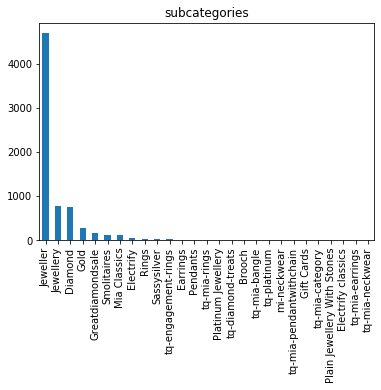

In [32]:
products.subcategories.value_counts().plot.bar()
plt.title("subcategories")

### Bivariate product catalog insights on category/subcategory level. 

#### Category Vs Availability

Text(0.5, 1.0, 'Category Vs Availability')

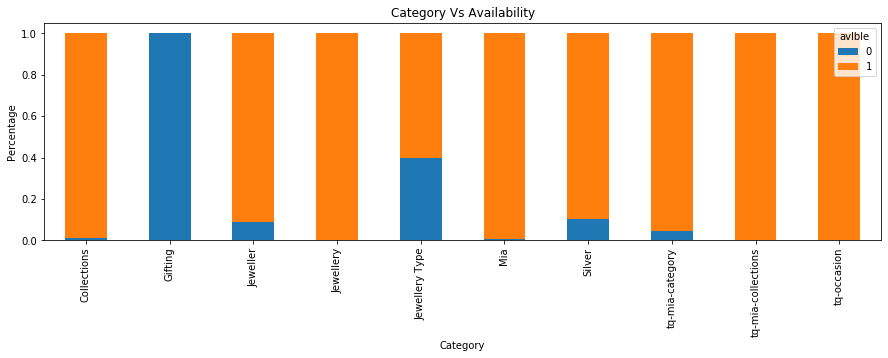

In [33]:
category = pd.crosstab(products['category'], products['avlble'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs Availability')

#### Sub-Category Vs Availability

Text(0.5, 1.0, 'Sub-Category Vs Availability')

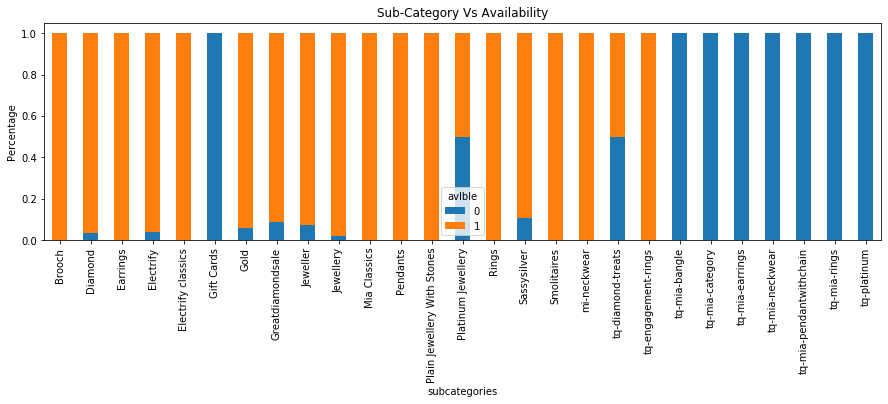

In [34]:
subcategories=pd.crosstab(products['subcategories'], products['avlble'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs Availability')

#### Category Vs brand

Text(0.5, 1.0, 'Category Vs brand')

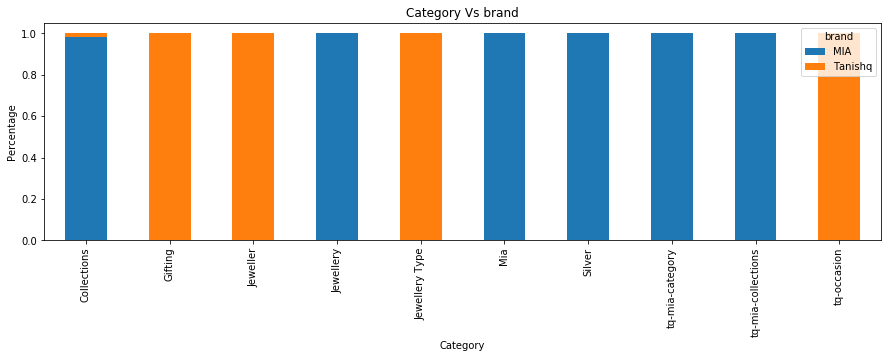

In [35]:
category = pd.crosstab(products['category'], products['brand'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs brand')

#### Sub-Category Vs brand

Text(0.5, 1.0, 'Sub-Category Vs brand')

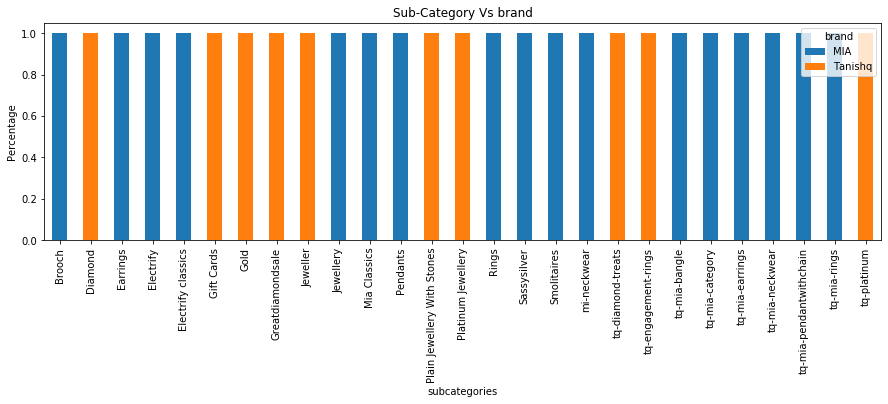

In [36]:
subcategories=pd.crosstab(products['subcategories'], products['brand'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs brand')

In [37]:
products['diamond_clarity'].value_counts()

SI2         2554
I1 I2        833
VS           232
SI            96
VVS1          41
I1I2          38
VVS           36
SI1           14
VS2           11
MIXED         11
VS1            9
B              3
VVS2           2
S12            2
VS1 OR D       1
I2             1
Name: diamond_clarity, dtype: int64

#### Category Vs diamond_clarity

Text(0.5, 1.0, 'Category Vs diamond_clarity')

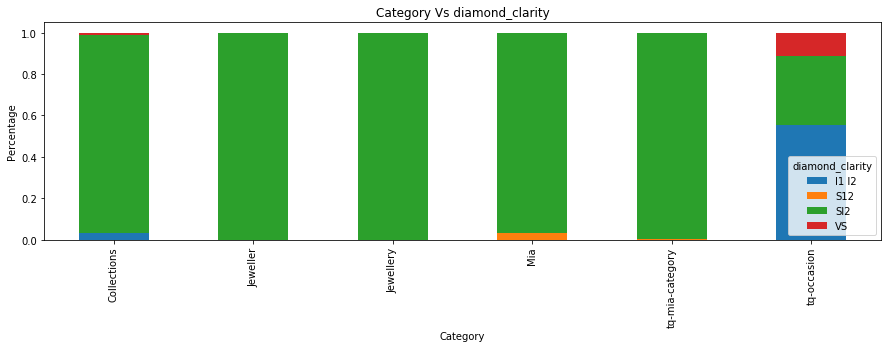

In [38]:
category = pd.crosstab(products['category'], products['diamond_clarity'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs diamond_clarity')

#### Sub-Category Vs diamond_clarity

Text(0.5, 1.0, 'Sub-Category Vs diamond_clarity')

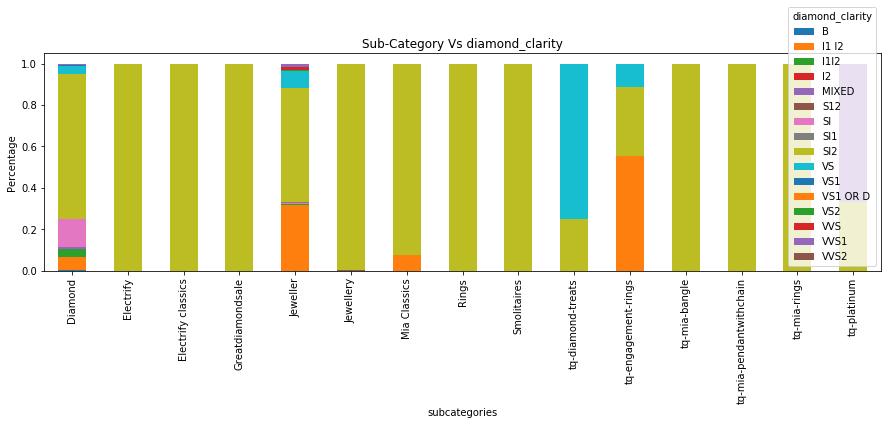

In [39]:
subcategories = pd.crosstab(products['subcategories'], products['diamond_clarity'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs diamond_clarity')

#### Category Vs diamond_cut

Text(0.5, 1.0, 'Category Vs diamond_cut')

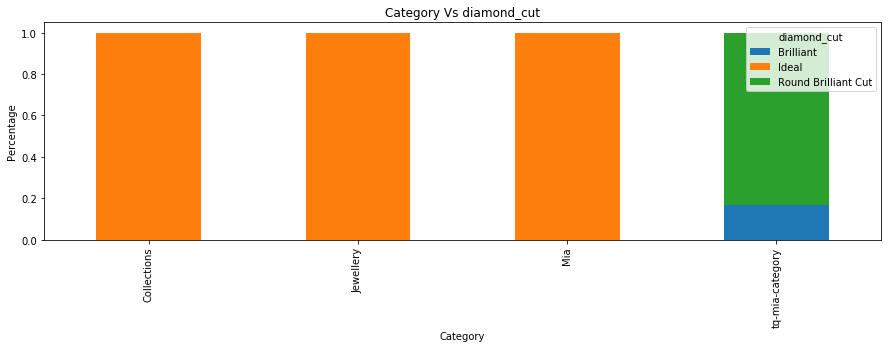

In [40]:
category = pd.crosstab(products['category'], products['diamond_cut'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs diamond_cut')

#### Sub-Category Vs diamond_cut

Text(0.5, 1.0, 'Sub-Category Vs diamond_cut')

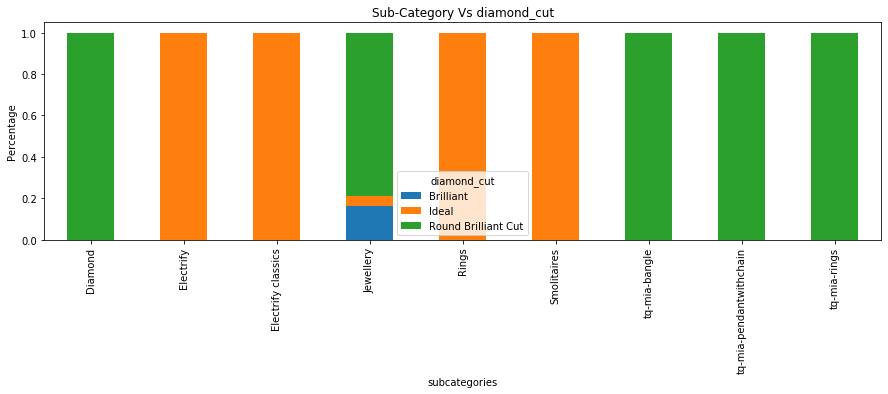

In [41]:
subcategories = pd.crosstab(products['subcategories'], products['diamond_cut'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs diamond_cut')

#### Category Vs diamond_color

Text(0.5, 1.0, 'Category Vs diamond_color')

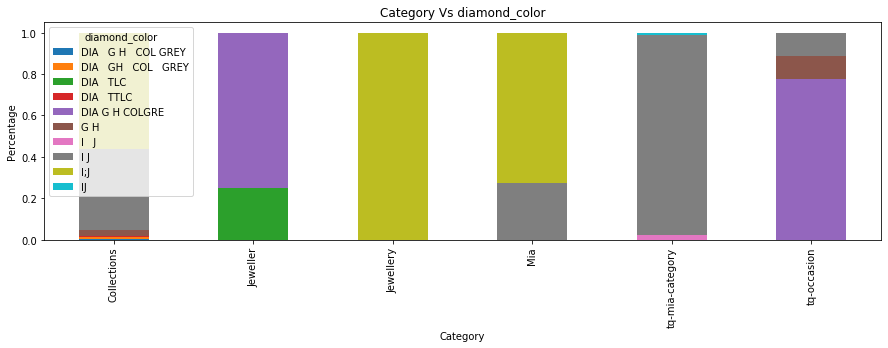

In [42]:
category = pd.crosstab(products['category'], products['diamond_color'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs diamond_color')

#### Sub-Category Vs diamond_color

Text(0.5, 1.0, 'Sub-Category Vs diamond_color')

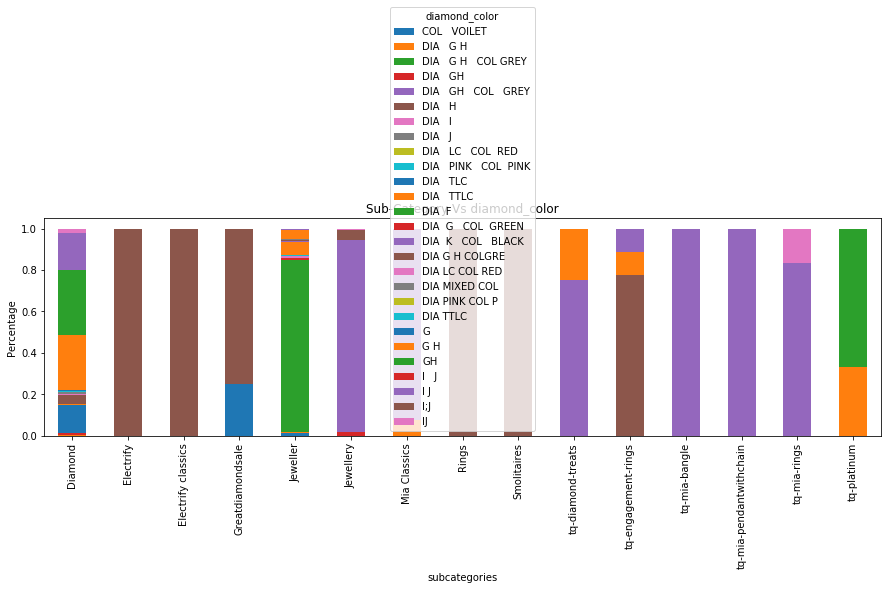

In [43]:
subcategories = pd.crosstab(products['subcategories'], products['diamond_color'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs diamond_color')

#### Category Vs discount_percentage

Text(0.5, 1.0, 'Category Vs discount_percentage')

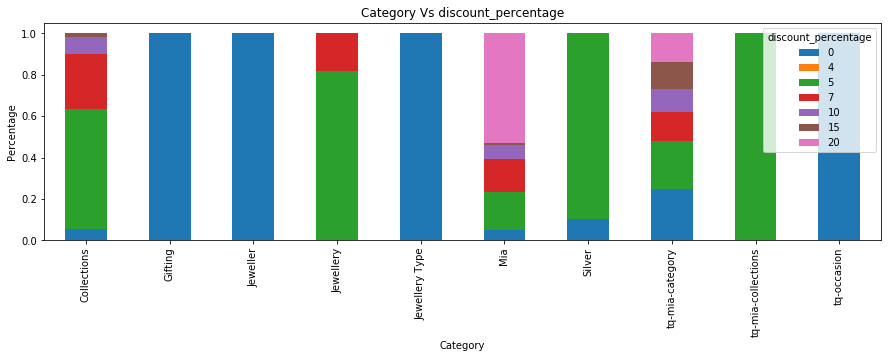

In [44]:
category = pd.crosstab(products['category'], products['discount_percentage'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs discount_percentage')

#### Sub-Category Vs discount_percentage

Text(0.5, 1.0, 'Sub-Category Vs discount_percentage')

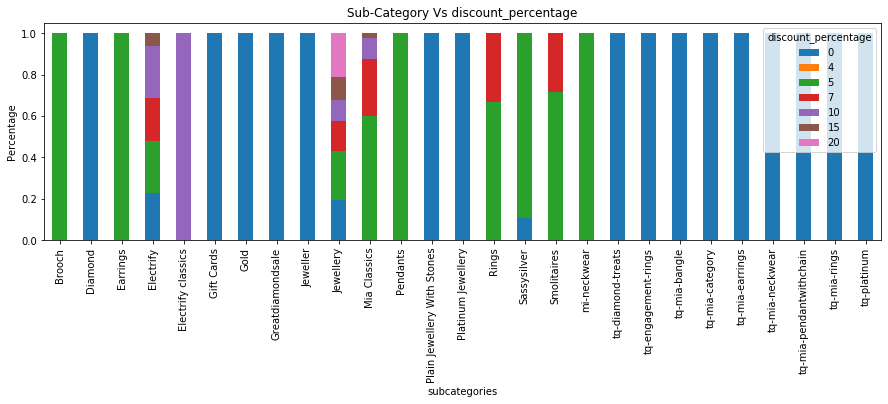

In [45]:
subcategories = pd.crosstab(products['subcategories'], products['discount_percentage'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs discount_percentage')

#### Category Vs gender

Text(0.5, 1.0, 'Category Vs gender')

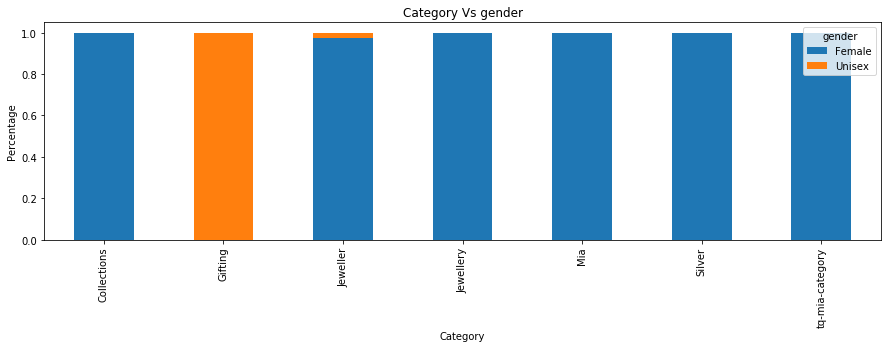

In [46]:
category = pd.crosstab(products['category'], products['gender'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs gender')

#### Sub-Category Vs gender

Text(0.5, 1.0, 'Sub-Category Vs gender')

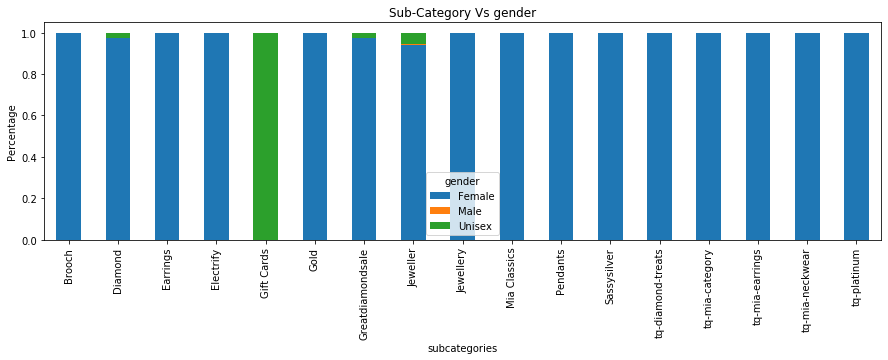

In [47]:
subcategories = pd.crosstab(products['subcategories'], products['gender'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs gender')

#### Category Vs occasion

Text(0.5, 1.0, 'Category Vs occasion')

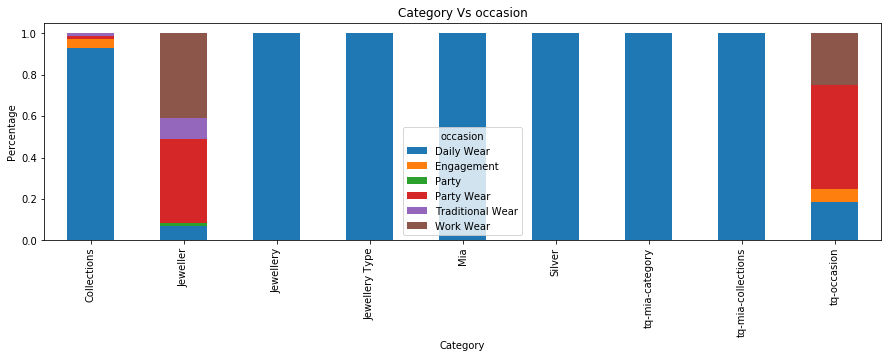

In [48]:
category = pd.crosstab(products['category'], products['occasion'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs occasion')

#### Sub-Category Vs occasion

Text(0.5, 1.0, 'Sub-Category Vs occasion')

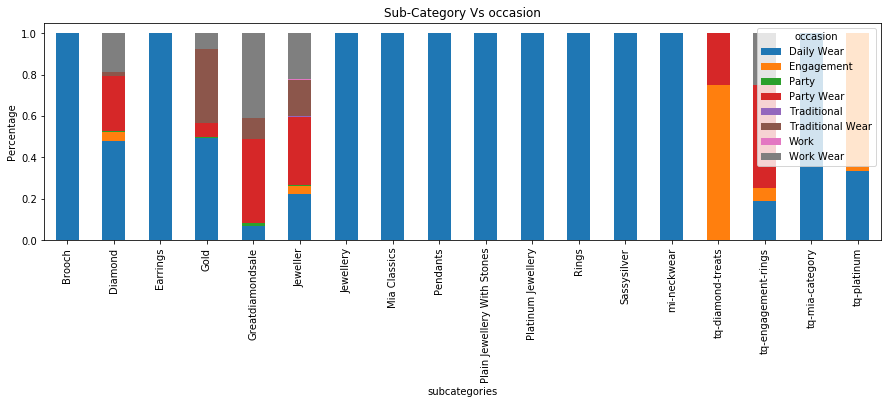

In [49]:
subcategories = pd.crosstab(products['subcategories'], products['occasion'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs occasion')

In [50]:
products.describe()

,_id,availability_date,avlble,color,created_on,discount_percentage,expiration_date,goldkaratage,gtin,last_modified_on,listprice,price,price_usd,sale_price_usd,trendrank
count,7.062000e+03,0.0,7062.000000,0.0,7.062000e+03,7062.000000,0.0,7061.000000,0.0,7.043000e+03,7062.000000,7062.000000,7062.000000,7062.000000,2866.000000
mean,1.708477e+38,NaN,0.936562,NaN,1.573652e+12,1.301614,NaN,21.915876,NaN,1.576821e+12,32194.787171,31939.503965,453.734414,450.178574,10.607118
std,9.772868e+37,NaN,0.243767,NaN,5.546037e+08,3.845692,NaN,15.186294,NaN,3.853992e+08,29436.788589,29480.953269,413.093378,413.738193,29.023224
min,3.688840e+34,NaN,0.000000,NaN,1.559910e+12,0.000000,NaN,14.000000,NaN,1.573620e+12,100.000000,100.000000,1.390000,1.390000,1.000000
25%,8.817030e+37,NaN,1.000000,NaN,1.573540e+12,0.000000,NaN,18.000000,NaN,1.576830e+12,14835.000000,14493.750000,209.782500,205.542500,1.000000
50%,1.699230e+38,NaN,1.000000,NaN,1.573540e+12,0.000000,NaN,18.000000,NaN,1.576920e+12,23364.500000,22944.000000,330.630000,324.840000,2.000000
75%,2.534990e+38,NaN,1.000000,NaN,1.573540e+12,0.000000,NaN,22.000000,NaN,1.576920e+12,39503.000000,39164.500000,556.902500,551.987500,5.000000
max,3.402690e+38,NaN,1.000000,NaN,1.576830e+12,20.000000,NaN,95.000000,NaN,1.577030e+12,309420.000000,309420.000000,4340.300000,4340.300000,594.000000


#### Making bins for price feature

In [51]:
bins=[0,14493,22944,39164,309420]
products['price'] = pd.cut(products['price'], bins, labels=["Low", "Average", "High", "Very High"])

#### Category Vs price

Text(0.5, 1.0, 'Category Vs price')

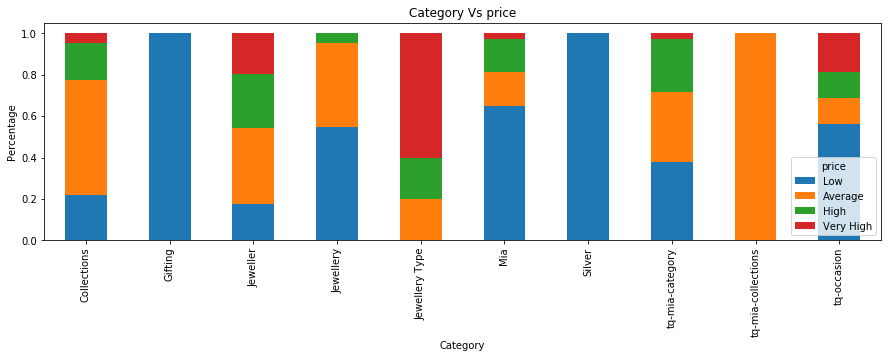

In [52]:
category = pd.crosstab(products['category'], products['price'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs price')

#### Sub-Category Vs price

Text(0.5, 1.0, 'Sub-Category Vs price')

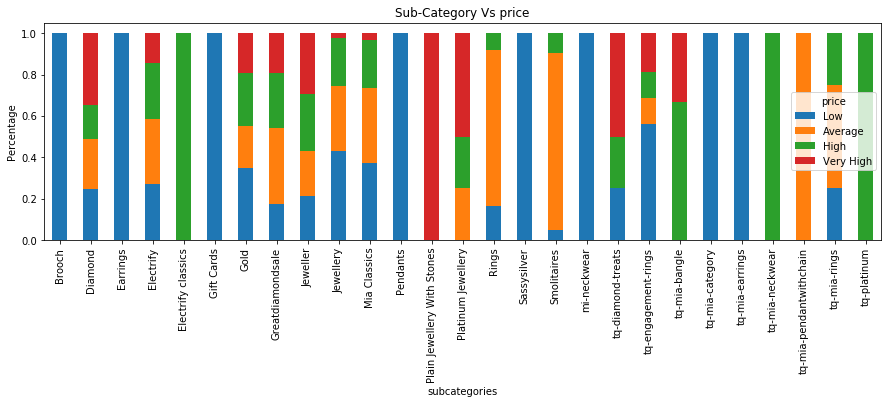

In [53]:
subcategories = pd.crosstab(products['subcategories'], products['price'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs price')

#### Category Vs product

Text(0.5, 1.0, 'Category Vs product')

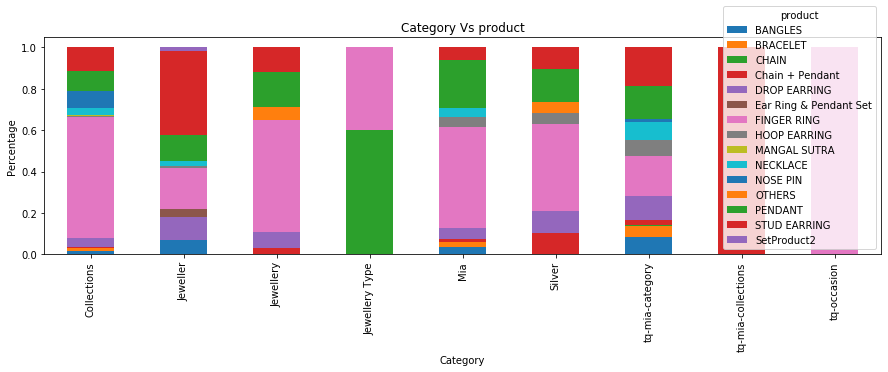

In [54]:
category = pd.crosstab(products['category'], products['product'])
category.div(category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Vs product')

#### Sub-Category Vs product

Text(0.5, 1.0, 'Sub-Category Vs product')

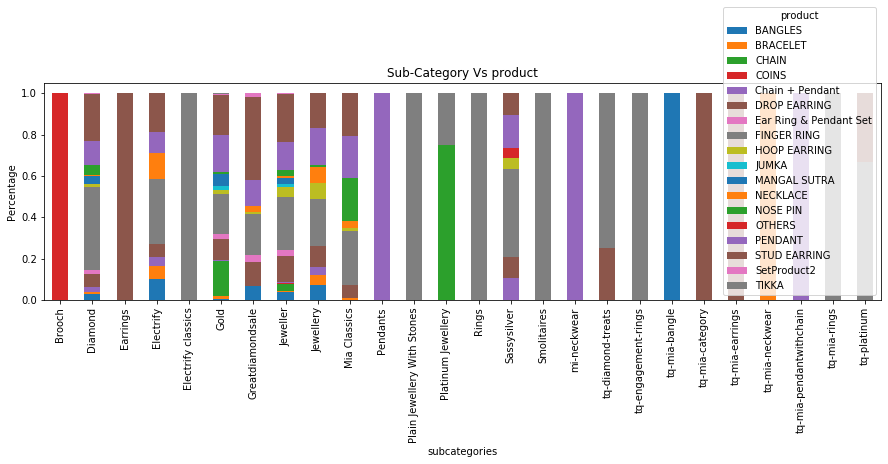

In [55]:
subcategories = pd.crosstab(products['subcategories'], products['product'])
subcategories.div(subcategories.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xlabel('subcategories')
plt.ylabel('Percentage')
plt.title('Sub-Category Vs product')

### Task 3: Identify the major factors affecting users buying decisions

In [56]:
a = Event.action_type.value_counts()
print("Percentage of products actually placed order the product",(a[4]/(a[1]+a[2]+a[3]+a[4]+a[5]+a[6]))*100,'%')

Percentage of products actually placed order the product 2.7692934229281203 %


In [78]:
Event['user_type'].value_counts()

guest    795528
email      6282
Name: user_type, dtype: int64

In [76]:
Event['Counter'] = 1 
Event.groupby(['user_type','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,add_to_cart,add_to_wishlist,place_order,register,remove_from_cart,remove_from_wishlist,view
user_type,,,,,,,
email,288.0,208.0,81.0,110.0,193.0,0.0,5402.0
guest,3757.0,0.0,55.0,0.0,202.0,17.0,791497.0


In [88]:
OrderByEmail = (81/6282)*100
OrderAsGuest = (55/795528)*100
print("Order Placed By email", OrderByEmail,"% \nOrder Placed as guest", OrderAsGuest, "%")

Order Placed By email 1.2893982808022924 % 
Order Placed as guest 0.006913647288341831 %


#### We can see that order placed by email has much more percentage of order placed than order placed as guest.

In [74]:
print("order placed based on referrer from Social Media",Event[Event.action_type == 'place_order']['referrer'].count())

order placed based on referrer from Social Media 2


#### Only Two order is placed based on refferer i.e is facebook. so Applying ads on facebook can bring more trafic.

#### No Order is placed based on utm_source, utm_medium, utm_campaign and utm_content. There's may be problems of not coming an order.

In [82]:
# Medium from which users are coming.
Event['utm_medium'].value_counts()

cpc                 158462
retargeting          19219
web                  14466
CPC                   1001
Click to website         6
Banners                  5
email                    4
71432512513              1
banner                   1
post                     1
71432512553              1
71432518753              1
71432516593              1
71432512313              1
Mailer                   1
Name: utm_medium, dtype: int64

In [83]:
Event['Counter'] = 1 
Event.groupby(['utm_medium','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,view,register,add_to_cart,add_to_wishlist
utm_medium,,,,
71432512313,1.0,0.0,0.0,0.0
71432512513,1.0,0.0,0.0,0.0
71432512553,1.0,0.0,0.0,0.0
71432516593,1.0,0.0,0.0,0.0
71432518753,1.0,0.0,0.0,0.0
Banners,5.0,0.0,0.0,0.0
CPC,1001.0,0.0,0.0,0.0
Click to website,6.0,0.0,0.0,0.0
Mailer,1.0,0.0,0.0,0.0


#### Maximum Amount of traffic is coming from cpc. this may be a sign that, medium through which traffic is coming, they just directing the traffic to the website for cpc but have no major users to place an order.

In [84]:
# Segmenting user bowsing activity according to the campaign.
Event['Counter'] = 1 
Event.groupby(['utm_campaign','action_type'])['Counter'].sum().unstack().fillna(0)

action_type,view,add_to_cart,add_to_wishlist,register
utm_campaign,,,,
271945369,5.0,0.0,0.0,0.0
AT2019,1.0,0.0,0.0,0.0
Google-_-BD-_-HockeyCurve-_-June,5.0,0.0,0.0,0.0
Promises - GMB,6.0,0.0,0.0,0.0
Sok_Conv_CollectionAd_Prospecting_Tanishq_EngagementRings_Int_EngagementRing_All_261119,660.0,0.0,0.0,0.0
Sok_Conv_PPLA_Prospecting_Tanishq_EngagementRings_Dem_Engagement_All_211119,257.0,0.0,0.0,0.0
Sok_Conv_PPLA_Prospecting_Tanishq_EngagementRings_Int_EngagementRing_All_211119,84.0,0.0,0.0,0.0
Sok_DBA_Tanishq_Beh_RellationshipStatus_All_230219,1202.0,12.0,2.0,0.0
Sok_DPA_Tanishq_MultipleProductCategories_CartAbandoners_MultipleDurations_120619,2526.0,93.0,2.0,1.0


#### Here also we can see in utm campaign, maximum traffic is coming from multiple ads which is only for view that means no proper traffic to buy something.